# User Sampling

<hr style="border:2px solid black"> </hr>

## Sample users for performance and results testing

Sample large users for performance testing and random users for results testing

---

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [2]:
def num_uniques(ser):
    try:
        return len(ser.unique())
    except:
        return "Not unique check-able"
    
def summarize_df(df):
    print("======DATA SUMMARY======")
    print("{} rows by {} columns".format(df.shape[0], df.shape[1]))
    print("\n======COLUMNS======")
    print(df.dtypes)
    print("\n======PREVIEW======")
    display(df.head())
    print("\n======NUMERICAL COL SUMMARY======")
    print(df.describe())
    print("\n")
    for col in df.columns:
        print("{}: {} unique values".format(col, num_uniques(df[col])))

---
### Import data

In [3]:
users_in = pd.read_csv('../05_RecipeExplorationTool/data/users_in_count2_mean4.csv')

In [4]:
summarize_df(users_in)

======DATA SUMMARY======
599009 rows by 3 columns

======COLUMNS======
user_id        int64
recipe_id      int64
ratings      float64
dtype: object

======PREVIEW======


,user_id,recipe_id,ratings
0,0,1118,5.0
1,0,27680,5.0
2,0,32541,5.0
3,0,137353,5.0
4,0,16428,5.0



======NUMERICAL COL SUMMARY======
             user_id      recipe_id        ratings
count  599009.000000  599009.000000  599009.000000
mean     4450.979807   87765.758825       4.658464
std      5644.504991   51419.630852       0.818773
min         0.000000       0.000000       0.000000
25%       480.000000   43034.000000       5.000000
50%      1927.000000   87776.000000       5.000000
75%      6339.000000  132193.000000       5.000000
max     25075.000000  178262.000000       5.000000


user_id: 25006 unique values
recipe_id: 85519 unique values
ratings: 6 unique values


In [5]:
users_in_gb = users_in[['user_id']].groupby('user_id', as_index=False).size()

In [6]:
users_in_gb.sort_values('size', ascending=False).head(20)

,user_id,size
94,94,3954
275,275,3699
193,193,3053
208,208,2748
241,241,2663
130,130,2438
164,164,2301
564,564,2140
267,267,2111
56,56,2025


<AxesSubplot:ylabel='Frequency'>

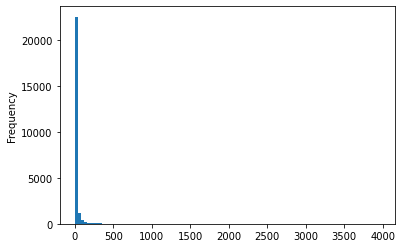

In [7]:
users_in_gb['size'].plot.hist(bins=100)

In [8]:
users_in_gb_lt500 = users_in_gb[users_in_gb['size'] <= 500]

<AxesSubplot:ylabel='Frequency'>

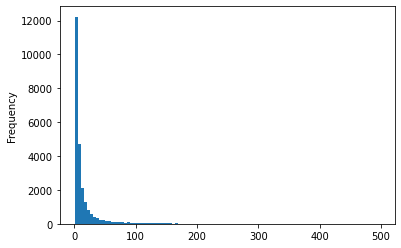

In [9]:
users_in_gb_lt500['size'].plot.hist(bins=100)

In [10]:
users_in_gb_20to500 = users_in_gb[(users_in_gb['size'] > 20) & (users_in_gb['size'] <= 500)]

<AxesSubplot:ylabel='Frequency'>

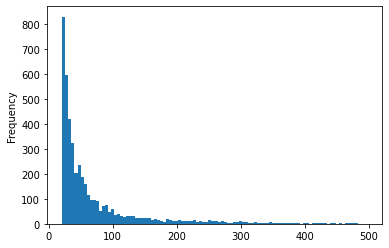

In [11]:
users_in_gb_20to500['size'].plot.hist(bins=100)

In [12]:
users_in_gb_20to500.sample(40).to_csv('test_user_ids.csv')

---
### Define combinations of filters

In [13]:
a = pd.DataFrame(np.array([['Similar', 'Dissimilar', "Doesn't Matter"], [0, 0, 0]]).T)

In [14]:
a.merge(a.merge(a.merge(a, on=1), on=1), on=1).to_csv('combinations.csv')

/var/folders/7q/8z88_mwj3794m0rym_nqtk6m0000gn/T/ipykernel_50629/399400572.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_y'} in the result is deprecated and will raise a MergeError in a future version.
  a.merge(a.merge(a.merge(a, on=1), on=1), on=1).to_csv('combinations.csv')
